<a href="https://colab.research.google.com/github/hhammza/ML-Continued/blob/main/Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: write a code to unzip BrainTumorData.zip
from zipfile import ZipFile

with ZipFile('/content/archive.zip', 'r') as zipobj:
    zipobj.extractall('BrainTumorData')


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [4]:
#count number of inmages inthe respective classes 0 - Brain Tumor and 1 - Healthy
ROOT_DIR = '/content/BrainTumorData/Brain Tumor Data Set/Brain Tumor Data Set'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [5]:
number_of_images.items()

dict_items([('Healthy', 2087), ('Brain Tumor', 2513)])

# we wil split the data such that

* 70% for training Data
* 15% for Validation
* 15% for testing

In [6]:
def dataFolder(p, split, number_of_images):
  if not os.path.exists("./" + p):
    os.mkdir("./" + p)
    print(f"{p} folder created.")
  else:
    print(f"{p} folder already exists.")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs(f"./{p}/{dir}", exist_ok=True)

    img_list = os.listdir(os.path.join(ROOT_DIR, dir))
    sample_size = math.floor(split * number_of_images[dir]) - 5  # << using original count

    if sample_size > 0 and sample_size <= len(img_list):
      selected_imgs = np.random.choice(img_list, size=sample_size, replace=False)
      for img in selected_imgs:
        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join("./" + p, dir)
        shutil.copy(O, D)
        os.remove(O)
    else:
      print(f"Skipping {dir}: Not enough images to sample {sample_size}.")

In [7]:
dataFolder('train', 0.7, number_of_images)

train folder already exists.


In [8]:
dataFolder('test', 0.15, number_of_images)

test folder already exists.


In [9]:
dataFolder('validation', 0.15, number_of_images)

validation folder already exists.


In [10]:
#count number of inmages inthe respective classes 0 - Brain Tumor and 1 - Healthy
ROOT_DIR = '/content/BrainTumorData/Brain Tumor Data Set/Brain Tumor Data Set'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Healthy', 16), ('Brain Tumor', 17)])

In [11]:
# shutil.rmtree('/content/train')
# shutil.rmtree('/content/test')
# shutil.rmtree('/content/validation')

# Model Build

In [12]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [13]:
# CNN Model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Preparing our data using data generator

In [15]:
def preprocessingImagesfortrain(path):
  """
  input: path
  output: preprocessed images
  """

  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)  # data augmentation
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

  return image

In [16]:
path = "/content/train"
train_data = preprocessingImagesfortrain(path)

Found 4189 images belonging to 2 classes.


In [17]:
def preprocessingImagesforval(path):
  """
  input: path
  output: preprocessed images
  """

  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

  return image

In [18]:
val_data = preprocessingImagesforval('/content/validation')

Found 1262 images belonging to 2 classes.


In [19]:
test_data = preprocessingImagesforval('/content/test')

Found 1258 images belonging to 2 classes.


In [20]:
# EARLY stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=6, verbose=1, mode='auto')

# model check point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose=1, save_best_only=True, mode='auto')

cd = [es, mc]

# Model Training

In [21]:
hs = model.fit(x=train_data,
                         steps_per_epoch=8,
                         epochs=30,
                         verbose=1,
                         validation_data=val_data,
                         validation_steps=16,
                         callbacks=cd)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.4966 - loss: 0.9556
Epoch 1: val_accuracy improved from -inf to 0.59570, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 929ms/step - accuracy: 0.5004 - loss: 0.9460 - val_accuracy: 0.5957 - val_loss: 0.6734
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.6322 - loss: 0.6728
Epoch 2: val_accuracy improved from 0.59570 to 0.61133, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6301 - loss: 0.6726 - val_accuracy: 0.6113 - val_loss: 0.6312
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.5851 - loss: 0.6734
Epoch 3: val_accuracy improved from 0.61133 to 0.65039, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - accuracy: 0.5848 - loss: 0.6754 - val_accuracy: 0.6504 - val_loss: 0.6502
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5383 - loss: 0.6743
Epoch 4: val_accuracy did not improve from 0.65039
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5374 - loss: 0.6742 - val_accuracy: 0.5820 - val_loss: 0.6449
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5927 - loss: 0.6736
Epoch 5: val_accuracy improved from 0.65039 to 0.67578, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 399ms/step - accuracy: 0.5932 - loss: 0.6725 - val_accuracy: 0.6758 - val_loss: 0.6151
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.5997 - loss: 0.6565
Epoch 6: val_accuracy did not improve from 0.67578
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 763ms/step - accuracy: 0.6064 - loss: 0.6516 - val_accuracy: 0.6738 - val_loss: 0.6148
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6145 - loss: 0.6433
Epoch 7: val_accuracy improved from 0.67578 to 0.70703, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 375ms/step - accuracy: 0.6165 - loss: 0.6424 - val_accuracy: 0.7070 - val_loss: 0.5867
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6516 - loss: 0.6296
Epoch 8: val_accuracy improved from 0.70703 to 0.76562, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 589ms/step - accuracy: 0.6499 - loss: 0.6307 - val_accuracy: 0.7656 - val_loss: 0.5621
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.6339 - loss: 0.6091
Epoch 9: val_accuracy did not improve from 0.76562
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 589ms/step - accuracy: 0.6342 - loss: 0.6089 - val_accuracy: 0.7422 - val_loss: 0.4950
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.7124 - loss: 0.5676
Epoch 10: val_accuracy did not improve from 0.76562
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 556ms/step - accuracy: 0.7122 - loss: 0.5680 - val_accuracy: 0.7363 - val_loss: 0.5227
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.7887 - loss: 0.5157
Epoch 11: val_accuracy did not improve from 0.76562
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 529ms/step - accuracy: 0.7831 - loss: 0.5170 - val_accuracy: 0.7656 - val_loss: 0.4954
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.8041 - loss: 0.4876
Epoch 12: val_accuracy improved from 0.76562 t

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 674ms/step - accuracy: 0.8055 - loss: 0.4874 - val_accuracy: 0.8008 - val_loss: 0.4710
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.7861 - loss: 0.5176
Epoch 13: val_accuracy did not improve from 0.80078
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 523ms/step - accuracy: 0.7856 - loss: 0.5142 - val_accuracy: 0.7969 - val_loss: 0.4553
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.7969 - loss: 0.5301
Epoch 14: val_accuracy improved from 0.80078 to 0.80664, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 569ms/step - accuracy: 0.7925 - loss: 0.5331 - val_accuracy: 0.8066 - val_loss: 0.4938
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.7287 - loss: 0.5582
Epoch 15: val_accuracy did not improve from 0.80664
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 590ms/step - accuracy: 0.7276 - loss: 0.5577 - val_accuracy: 0.7578 - val_loss: 0.4829
Epoch 16/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.7959 - loss: 0.4783
Epoch 16: val_accuracy improved from 0.80664 to 0.81055, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 649ms/step - accuracy: 0.7951 - loss: 0.4786 - val_accuracy: 0.8105 - val_loss: 0.4328
Epoch 17/30
3/8 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7031 - loss: 0.5465
Epoch 17: val_accuracy did not improve from 0.81055
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.7324 - loss: 0.5193 - val_accuracy: 0.7988 - val_loss: 0.4349
Epoch 18/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.7564 - loss: 0.5464
Epoch 18: val_accuracy did not improve from 0.81055
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.7535 - loss: 0.5499 - val_accuracy: 0.7480 - val_loss: 0.5172
Epoch 18: early stopping


### Model graphical representation

In [22]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

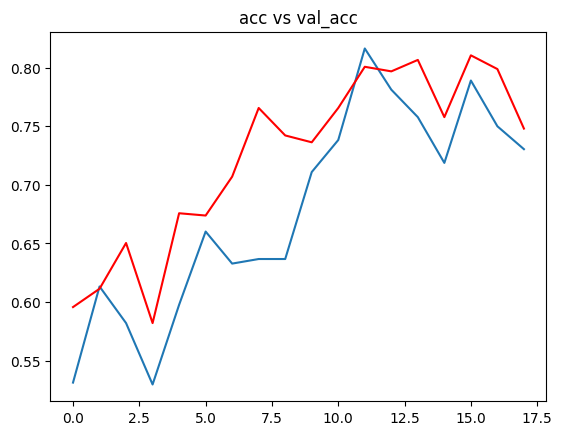

In [23]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')

plt.title('acc vs val_acc')
plt.show()

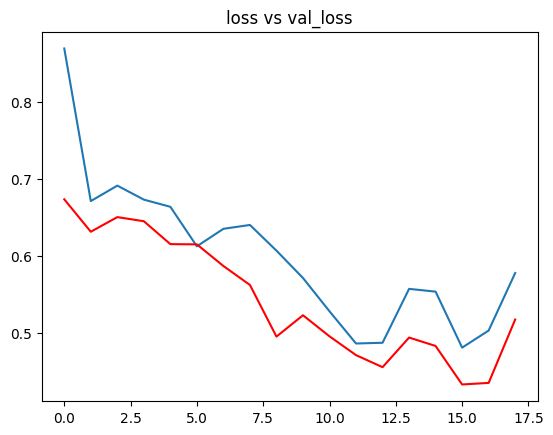

In [24]:
import matplotlib.pyplot as plt
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')

plt.title('loss vs val_loss')
plt.show()

### Model Accuracy

In [25]:
from keras.models import load_model
model = load_model("/content/bestmodel.h5")

In [27]:
acc = model.evaluate(test_data)[1]

print(f"The accuracy of our model is {acc*100}%")

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.8246 - loss: 0.4148
The accuracy of our model is 81.7965030670166%


In [28]:
from keras.preprocessing.image import load_img, img_to_array

* Use Model to check whether person has tumor or not.

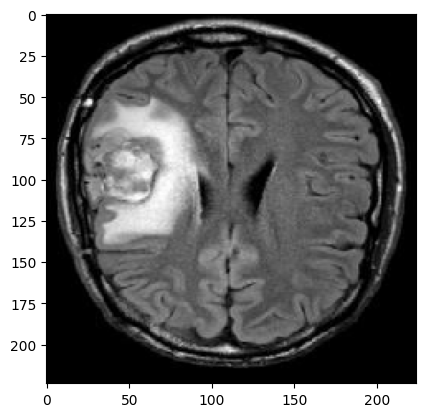

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The person has Brain Tumor


In [42]:
path = "/content/BrainTumorData/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1652).jpg"

img = load_img(path, target_size=(224,224))

input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)

pred_prob = model.predict(input_arr)[0][0]
pred = 1 if pred_prob > 0.5 else 0

pred

if pred == 0:
  print("The person has Brain Tumor")
else:
  print("The person has no Brain Tumor")